In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.sparse import diags
from scipy.sparse.linalg import factorized
from PIL import Image

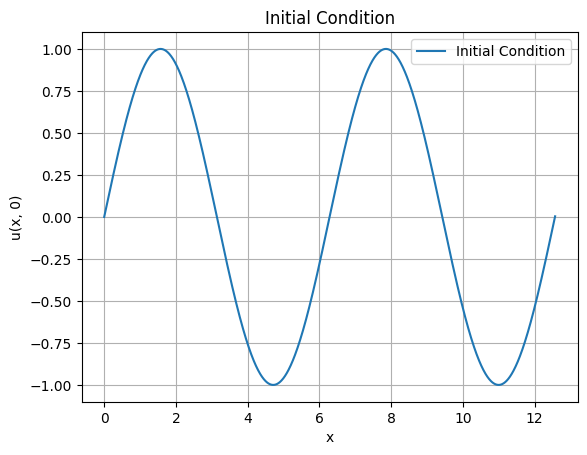

In [10]:
L = np.pi*2 * 2
T = 20

a  = 1e0
dx = 1e-2
dt = 1e-2

x = np.arange(0, L+dx, dx)
t = np.arange(0, T+dt, dt)

Nt, Nx = len(t), len(x)

def u_0(x):
    return np.sin(x)

plt.plot(x, u_0(x), label='Initial Condition')
plt.xlabel('x')
plt.ylabel('u(x, 0)')
plt.title('Initial Condition')
plt.legend()
plt.grid()
plt.show()

In [11]:
u = np.zeros((Nt, Nx))
D2 = 1/(dx**2) * diags([1, -2, 1], [-1, 0, 1], shape=(Nx, Nx))
I  = diags([1], [0], shape=(Nx, Nx))

F = a*D2
A = (I - dt/2 * F)
B = (I + dt/2 * F)

solve = factorized(A.tocsc())

for i, ti in enumerate(t):
    if i == 0:
        u[0, :] = u_0(x)
    else:
        uj = u[i-1, :]
        u[i, :] = solve(B @ uj)
    
    if np.max(np.abs(u[i, :])) > 1e2:
        print(f"Blow up at time {ti:.3f}s")
        break
    
    if i % int(1/dt * 1e-1) == 0:
        print(f"Time {ti:.3f}s, u_max = {np.max(np.abs(u[i, :])):.3f}")

Time 0.000s, u_max = 1.000
Time 0.100s, u_max = 0.905
Time 0.200s, u_max = 0.819
Time 0.300s, u_max = 0.741
Time 0.400s, u_max = 0.671
Time 0.500s, u_max = 0.608
Time 0.600s, u_max = 0.550
Time 0.700s, u_max = 0.499
Time 0.800s, u_max = 0.451
Time 0.900s, u_max = 0.409
Time 1.000s, u_max = 0.370
Time 1.100s, u_max = 0.335
Time 1.200s, u_max = 0.304
Time 1.300s, u_max = 0.275
Time 1.400s, u_max = 0.249
Time 1.500s, u_max = 0.226
Time 1.600s, u_max = 0.204
Time 1.700s, u_max = 0.185
Time 1.800s, u_max = 0.168
Time 1.900s, u_max = 0.152
Time 2.000s, u_max = 0.138
Time 2.100s, u_max = 0.125
Time 2.200s, u_max = 0.113
Time 2.300s, u_max = 0.102
Time 2.400s, u_max = 0.093
Time 2.500s, u_max = 0.084
Time 2.600s, u_max = 0.076
Time 2.700s, u_max = 0.069
Time 2.800s, u_max = 0.062
Time 2.900s, u_max = 0.057
Time 3.000s, u_max = 0.051
Time 3.100s, u_max = 0.047
Time 3.200s, u_max = 0.042
Time 3.300s, u_max = 0.038
Time 3.400s, u_max = 0.035
Time 3.500s, u_max = 0.031
Time 3.600s, u_max = 0.029
T

In [12]:
def save_gif_PIL(outfile, files, fps=5, loop=0):
    "Helper function for saving GIFs"
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=round(1000/fps), loop=loop)

def make_plot(save=False, file_name=f"PDE_solution.png", ti=0):
    "Helper function for plotting"
    fig, ax = plt.subplots()
    ax.plot(x, u[i, :])
    ax.set_xlim(0, L)
    ax.set_ylim(-1.05, 1.05)
    ax.grid()
    ax.set_title(f"Time = {ti:.3f}s")
    if save:
        fig.savefig(file_name, bbox_inches="tight", pad_inches=0.1, dpi=100, facecolor="white")

In [13]:
import os
import shutil

folder_path="plots"
for item in os.listdir(folder_path):
    item_path = os.path.join(folder_path, item)
    try:
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.unlink(item_path)  # Remove file or symbolic link
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)  # Remove subdirectory and its contents
    except Exception as e:
        print(f"Failed to delete {item_path}. Reason: {e}")

In [14]:
files = []
fps   = 20
frame_indicies = np.linspace(0, Nt-1, int(fps*T), dtype=int)
for i in frame_indicies:
    ti = t[i]
    file = f"plots/PDE_sol_{ti:.5f}.png"
    make_plot(save=True, file_name=file, ti=ti)
    files.append(file)
    plt.close("all")
    
save_gif_PIL("PDE_solution.gif", files, fps=fps, loop=0)